In [1]:
import pandas
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
data_path = "./data/btcusd.csv"
data = pandas.read_csv(data_path)
data = data.drop("Date", axis=1)
data = data.drop("Adj Close", axis=1)

In [3]:
data = data.fillna(method="backfill")
data = data[data["Volume"] != data["Volume"].max()]

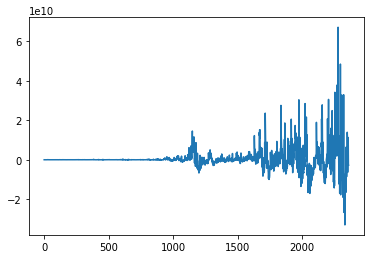

In [4]:
data = data - data.rolling(30).mean()
data = data.dropna()
data = data.reset_index(drop=True)
plt.plot(data["Volume"])

In [5]:
data = (data - data.min()) / (data.max() - data.min())

In [6]:
data_rose = [1. if data["Open"][i] < data["Open"][i+1] else 0. for i, _ in enumerate(data["Open"][:-1])]

In [7]:
days = 5

In [8]:
data_input = torch.tensor([
    data.loc[i : i+days-1].to_numpy().flatten()
    for i in range(data.shape[0] - days - 1)
], dtype=torch.double)
data_rose = torch.tensor(data_rose[days:])

In [12]:
model = nn.Sequential(
    nn.Linear(5*days, 1),
    nn.Flatten(0, 1)
)

In [13]:
loss_fn = nn.MSELoss(reduction="sum")

In [14]:
lr = 5e-4
for i, v in enumerate(data_input):
    v_pred = model(data_input.float())
    loss = loss_fn(v_pred, data_rose)
    if i % 100 == 99:
        print(i, loss)
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad

99 tensor(nan, grad_fn=<MseLossBackward>)
199 tensor(nan, grad_fn=<MseLossBackward>)
299 tensor(nan, grad_fn=<MseLossBackward>)
399 tensor(nan, grad_fn=<MseLossBackward>)
499 tensor(nan, grad_fn=<MseLossBackward>)
599 tensor(nan, grad_fn=<MseLossBackward>)
699 tensor(nan, grad_fn=<MseLossBackward>)
799 tensor(nan, grad_fn=<MseLossBackward>)
899 tensor(nan, grad_fn=<MseLossBackward>)
999 tensor(nan, grad_fn=<MseLossBackward>)
1099 tensor(nan, grad_fn=<MseLossBackward>)
1199 tensor(nan, grad_fn=<MseLossBackward>)
1299 tensor(nan, grad_fn=<MseLossBackward>)
1399 tensor(nan, grad_fn=<MseLossBackward>)
1499 tensor(nan, grad_fn=<MseLossBackward>)
1599 tensor(nan, grad_fn=<MseLossBackward>)
1699 tensor(nan, grad_fn=<MseLossBackward>)
1799 tensor(nan, grad_fn=<MseLossBackward>)
1899 tensor(nan, grad_fn=<MseLossBackward>)
1999 tensor(nan, grad_fn=<MseLossBackward>)
2099 tensor(nan, grad_fn=<MseLossBackward>)
2199 tensor(nan, grad_fn=<MseLossBackward>)
2299 tensor(nan, grad_fn=<MseLossBackward>)